Epoch:   200 	 Cost:   0.08856 	 W:0.3128 	 b:0.3653
Epoch:   400 	 Cost:   0.08409 	 W:0.2996 	 b:0.4588
Epoch:   600 	 Cost:   0.08133 	 W:0.2893 	 b:0.5321
Epoch:   800 	 Cost:   0.07964 	 W:0.2811 	 b:0.5896
Epoch:  1000 	 Cost:    0.0786 	 W:0.2748 	 b:0.6347
Epoch:  1200 	 Cost:   0.07795 	 W:0.2698 	 b:0.6701
Epoch:  1400 	 Cost:   0.07756 	 W:0.2659 	 b:0.6979
Epoch:  1600 	 Cost:   0.07732 	 W:0.2628 	 b:0.7196
Epoch:  1800 	 Cost:   0.07717 	 W:0.2604 	 b:0.7367
Epoch:  2000 	 Cost:   0.07708 	 W:0.2585 	 b:0.7501
Optimization Finished!
Final training cost: 0.07707569 W: 0.2585049 b: 0.7500964 



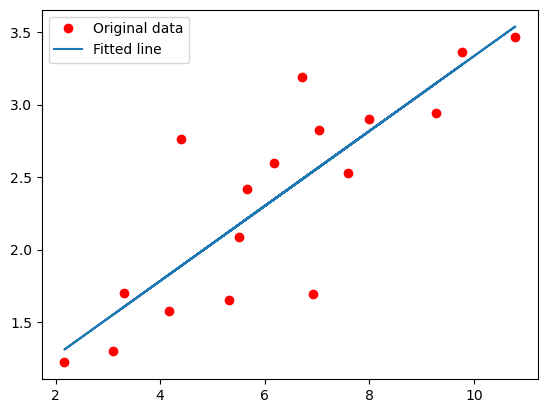

Final testing cost: 0.07705521
Absolute mean square loss difference: 2.0481646e-05


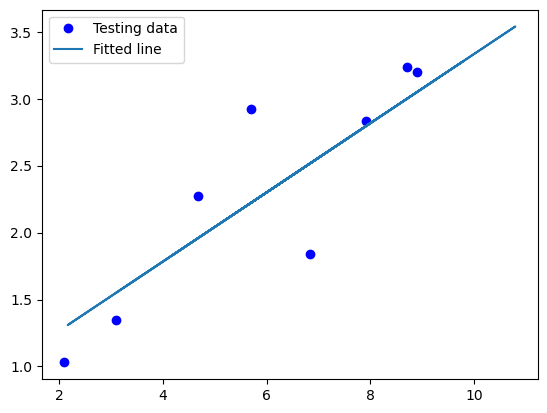

In [2]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

# Model Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 200

# Training Data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                     7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                     2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

# Test Data
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

# Set placeholders for feature and target vectors
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Set model weights and bias
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
linear_model = W * X + b

# Mean squared error
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2 * n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    # Load initialized variables in the current session
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        # Perform gradient descent step
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch + 1, c, sess.run(W), sess.run(b)))

    # Print final parameter values
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing the model
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]),
                            feed_dict={X: test_X, y: test_y})
    print("Final testing cost:", testing_cost)
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

    # Display fitted line on test data
    plt.plot(test_X, test_y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
